In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model
import matplotlib.pyplot as plt
from models.lstm.lstm_normalize import get_lstm_data

---

## For **build_model** function

In [3]:
model = build_model()

---

## For **train_model** function

[[0.87854817 0.87557511 0.87806361 0.88505659 0.89279531]
 [0.19549795 0.195839   0.19204731 0.19737968 0.19909675]
 [0.3397869  0.34017027 0.34169212 0.3413699  0.34090418]
 ...
 [0.65875    0.67217619 0.6669332  0.66146206 0.66020839]
 [0.83501667 0.83519067 0.83337716 0.83799455 0.83993738]
 [0.07042385 0.07251964 0.07549276 0.07573504 0.07340639]]
Epoch 1/50

152/152 [==============================] - 2s 4ms/step - loss: 0.0528 - val_loss: 4.9065e-04
Epoch 2/50
152/152 [==============================] - 0s 2ms/step - loss: 2.1485e-04 - val_loss: 1.3652e-04
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 1.2204e-04 - val_loss: 1.1319e-04
Epoch 4/50
152/152 [==============================] - 0s 2ms/step - loss: 1.0809e-04 - val_loss: 1.0306e-04
Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 9.6261e-05 - val_loss: 1.0102e-04
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 9.4886e-05 - val_loss: 9.2438e-05
E

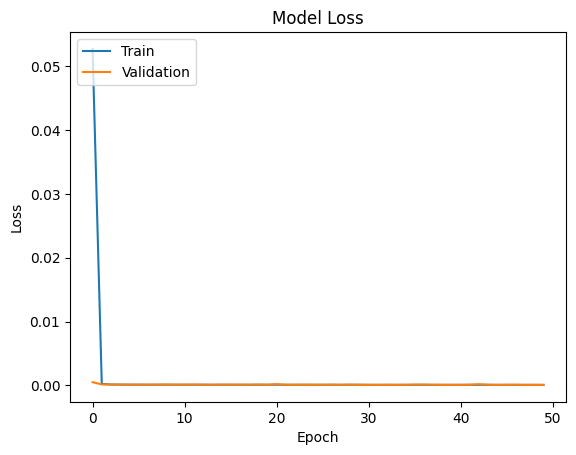

In [4]:
history = train_model()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [5]:
history

In [6]:
model

In [7]:
x_train, x_test, y_train, y_test = get_lstm_data()
    
predictions = model.predict(x_test[0])

[[0.87854817 0.87557511 0.87806361 0.88505659 0.89279531]
 [0.19549795 0.195839   0.19204731 0.19737968 0.19909675]
 [0.3397869  0.34017027 0.34169212 0.3413699  0.34090418]
 ...
 [0.65875    0.67217619 0.6669332  0.66146206 0.66020839]
 [0.83501667 0.83519067 0.83337716 0.83799455 0.83993738]
 [0.07042385 0.07251964 0.07549276 0.07573504 0.07340639]]
1/1 [==============================] - 0s 156ms/step


In [8]:
predictions.shape

(5, 20)

In [9]:
predictions[0]

array([-3.7537764e-03, -6.4014914e-03,  6.9954707e-03, -4.5194337e-03,
        1.5241293e-03,  5.2775173e-03, -3.7620892e-03, -2.4017673e-03,
        4.6378765e-03, -3.1981186e-03,  2.4642134e-03, -3.5133620e-03,
       -5.0944132e-03, -2.7398565e-03, -1.0890628e-03,  1.0598539e-02,
       -6.5144198e-03, -3.0598856e-04,  2.6345404e-03,  7.0373761e-05],
      dtype=float32)

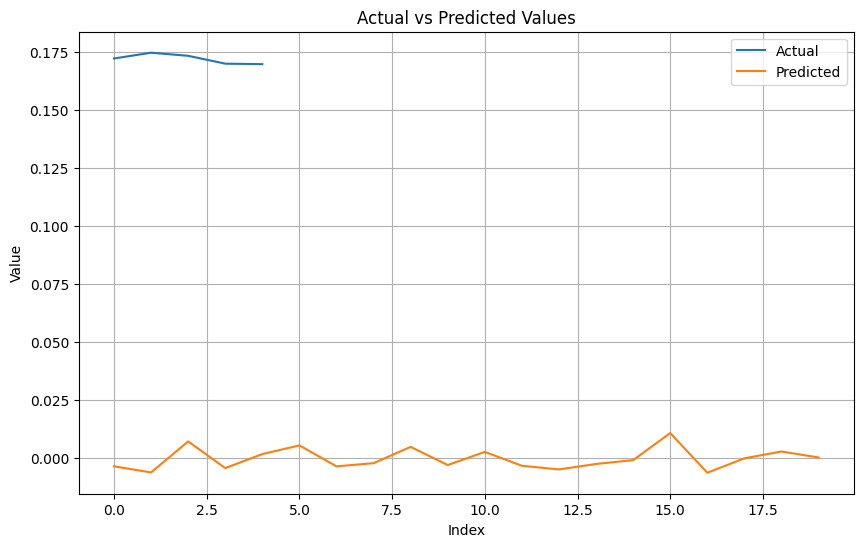

In [11]:
predictions

# Plotting the actual values (y_test) and the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test[0], label='Actual')
plt.plot(predictions[0], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()